In [24]:
#!pip install numpy gymnasium pygame pandas matplotlib tqdm imageio imageio[ffmpeg] imageio[pyav]

#### 👉Before you solve a Reinforcement Learning problem you need to define what are
- the environment
- the states
- the actions
- the rewards

#### 👉We are using the `FrozenLake-v1` environment from OpenAI's gym: https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

#### 👉`FrozenLake-v1` is an easy environment because the action space is small, and the state space is large but finite.

#### 👉Environments with a finite number of actions and states are called tabular

### Import the Gymnasium Library

In [25]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import  generate_random_map


### Create a FrozenLake-v1 environment with gym.make()
- default map=4x4
- In order to display the environment's current state you need to add the parameter==> render_mode="rgb_array"

In [26]:

env=gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
#env=gym.make("FrozenLake-v1",desc=generate_random_map(size=8), map_name="8x8", is_slippery=False, render_mode="rgb_array")

### We reset the environment to its initial state with state = env.reset()

In [27]:
state=env.reset()

#### State space
-  The state is a value representing the agent’s current position as current_row * nrows + current_col (where both the row and col start at 0).
- For example, the goal position in the 8x8 map can be calculated as follows: 7 * 8 + 7 = 63. The number of possible observations is dependent on the size of the map. For example, the 8x8 map has 64 possible states.

In [28]:
print("State Space {}".format(env.observation_space.n))
print(env.observation_space.sample())

State Space 16
8


#### Action space :
##### The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:

- 0: LEFT

- 1: DOWN

- 2: RIGHT

- 3: UP

In [29]:
print("Action Space {}".format(env.action_space.n))
print(env.action_space.sample())

Action Space 4
2


#### env.render(): display the environment's current state

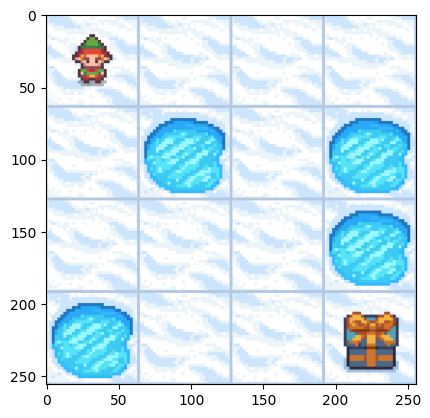

In [30]:
import matplotlib.pyplot as plt

image=env.render()
plt.imshow(image)


#### env.step(n_action)--> next state, reward, terminated,truncated, info
#### Updates an environment with actions returning:
 - the next agent state,
 - the reward for taking that actions,
 - if the environment has terminated or truncated due to the latest action
 - and information from the environment about the step

1 0.0 False False


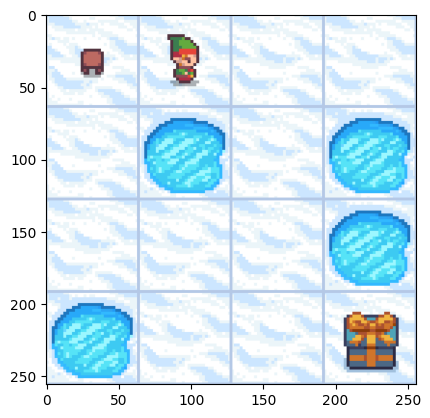

In [31]:
#apply the right action,
next_state, reward, isTerminated, isTruncated, _=env.step(2)
print(next_state, reward, isTerminated, isTruncated)
plt.imshow(env.render())

#### First, reset the environment, then define the trajectory which is a set of necessary actions required  to achieve the goal
#### Finally, record the different steps through a video

1 0.0 False False
2 0.0 False False
6 0.0 False False
10 0.0 False False
14 0.0 False False
15 1.0 True False


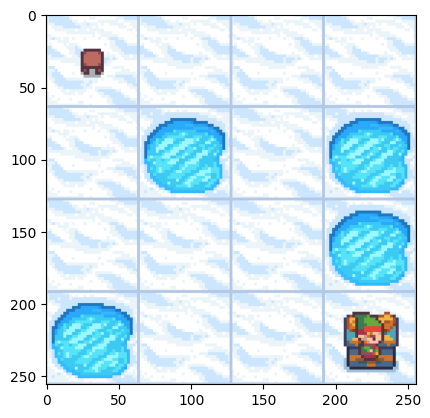

In [32]:
import imageio
import numpy as np

env.reset()
images=[]
images.append(env.render())

actions = [2, 2, 1, 1, 1, 2]
for i in actions:
    next_state, reward, isTerminated, isTruncated, _=env.step(i)
    print(next_state, reward, isTerminated, isTruncated)
    plt.imshow(env.render())
    images.append(env.render())

#right, right, down, down, down, right

#env.step(action)
#



imageio.mimsave('./render.mp4', [np.array(img) for i, img in enumerate(images)], fps=1)

In [33]:
from base64 import b64encode
from IPython.display import HTML
from IPython import display

# Show video
compressed_path = 'render.mp4'
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()


HTML("""<video width=400 controls>      <source src="%s" type="video/mp4"></video>""" % data_url)